<a href="https://colab.research.google.com/github/andreviniciusmb/COVID-19/blob/master/Analise_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_log_error
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

## Importando dataset

In [2]:
data = pd.read_csv('time_series_19-covid-Confirmed.csv')
print('Tamanho: ',data.shape)
data.head()

Tamanho:  (253, 72)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7


### Limpeza dos dados

In [3]:
data.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7


### Verificando os países que se encontra no dataset

In [4]:
paises = data['Country/Region'].unique()
paises

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

### Filtrando os países que seram analisados

In [0]:
# China
chi = pd.DataFrame(data[data['Country/Region'] == 'China'].groupby('Country/Region').sum())
china = list(chi.iloc[0].values)
datas = chi.iloc[0].index

In [0]:
### Brasil
br = pd.DataFrame(data[data['Country/Region'] == 'Brazil'].groupby('Country/Region').sum())
brasil = list(br.iloc[0].values)

In [0]:
### Italia
ita = pd.DataFrame(data[data['Country/Region'] == 'Italy'].groupby('Country/Region').sum())
italia = list(ita.iloc[0].values)

In [0]:
### Argentina
arg = pd.DataFrame(data[data['Country/Region'] == 'Argentina'].groupby('Country/Region').sum())
argentina = list(arg.iloc[0].values)

In [0]:
### EUA
usa = pd.DataFrame(data[data['Country/Region'] == 'US'].groupby('Country/Region').sum())
eua = list(usa.iloc[0].values)

In [0]:
### Chile
chi = pd.DataFrame(data[data['Country/Region'] == 'Chile'].groupby('Country/Region').sum())
chile = list(chi.iloc[0].values)

In [0]:
### Espanha
esp = pd.DataFrame(data[data['Country/Region'] == 'Spain'].groupby('Country/Region').sum())
espanha = list(esp.iloc[0].values)

In [0]:
### Coreia do Sul
korea = pd.DataFrame(data[data['Country/Region'] == 'Korea, South'].groupby('Country/Region').sum())
coreia_sul = list(korea.iloc[0].values)

In [0]:
dias = pd.Series(range(1,len(argentina)+1))

In [0]:
cols = {
    'Dias':dias,
    'Argentina': argentina,
    'Brasil': brasil,
    'Chile': chile,
    'China': china,
    'Coreia Sul': coreia_sul,
    'EUA': eua,
    'Espanha': espanha,
    'Italia': italia
}

### Dataset final que será usado

In [15]:
bd = pd.DataFrame(cols,columns=['Dias','Argentina','Brasil','Chile','China','Coreia Sul','EUA','Espanha','Italia'])
bd.tail()

,Dias,Argentina,Brasil,Chile,China,Coreia Sul,EUA,Espanha,Italia
63,64,387,2554,1142,81661,9137,65778,49515,74386
64,65,502,2985,1306,81782,9241,83836,57786,80589
65,66,589,3417,1610,81897,9332,101657,65719,86498
66,67,690,3904,1909,81999,9478,121478,73235,92472
67,68,745,4256,2139,82122,9583,140886,80110,97689


### Visualização dos dados

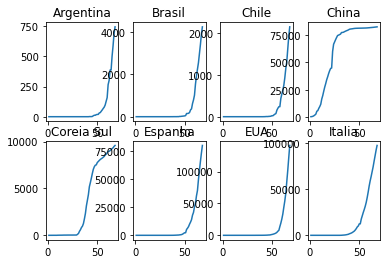

In [16]:
plt.subplot(2,4,1)
plt.plot(bd['Dias'],bd['Argentina'])
plt.title('Argentina')
plt.subplot(2,4,2)
plt.plot(bd['Dias'],bd['Brasil'])
plt.title('Brasil')
plt.subplot(2,4,3)
plt.plot(bd['Dias'],bd['Chile'])
plt.title('Chile')
plt.subplot(2,4,4)
plt.plot(bd['Dias'],bd['China'])
plt.title('China')
plt.subplot(2,4,5)
plt.plot(bd['Dias'],bd['Coreia Sul'])
plt.title('Coreia Sul')
plt.subplot(2,4,6)
plt.plot(bd['Dias'],bd['Espanha'])
plt.title('Espanha')
plt.subplot(2,4,7)
plt.plot(bd['Dias'],bd['EUA'])
plt.title('EUA')
plt.subplot(2,4,8)
plt.plot(bd['Dias'],bd['Italia'])
plt.title('Italia')

plt.show()

##### OBS: Qnd a China e Coreia do Sul, começaram a diminuir o número de pessoas infectadas os outros países começaram a aumentar o núúmero de infectados

### Modelos

### Primeiro modelo: Ajuste polinomial dos mínimos quadrados prevendo em um único país 

In [0]:
pais = 'Coreia Sul'

In [0]:
x = np.array(bd['Dias'])
y = np.array(bd[pais])

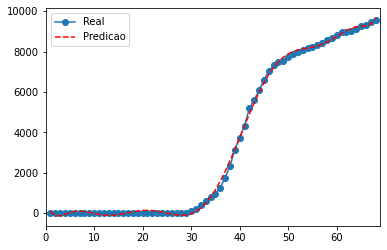

In [19]:
z = np.polyfit(x,y,10)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 68)
y_new = f(x_new)

plt.plot(x,y,'o-',label='Real')
plt.plot(x_new, y_new,'r--',label='Predicao')
plt.legend()
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [0]:
dias5 = np.array(range(68,73))

Previsao para os proximos 5 dias:  [ 9646 10325 11735 14365 18909]


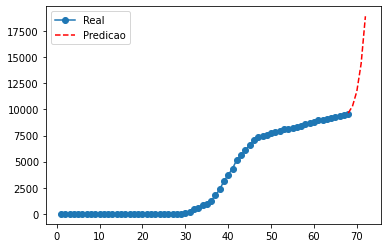

In [21]:
pred = f(dias5)
print('Previsao para os proximos 5 dias: ', pred.astype(int))

plt.plot(x,y,'o-',label='Real')
plt.plot(dias5,pred,'r--',label='Predicao')
plt.legend()
plt.show()

### Segundo modelo: Ajuste polinomial dos mínimos quadrados prevendo os casos confirmados no mundo inteiro

In [22]:
new_bd = pd.DataFrame(bd['Dias'])
new_bd['Total'] = np.ones(len(bd['Dias']))

for i in paises:
  aux = pd.DataFrame(data[data['Country/Region'] == i].groupby('Country/Region').sum())
  pais = list(aux.iloc[0].values)

  new_bd[i] = pais

new_bd.head()

,Dias,Total,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,...,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam
0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1.0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
## Contando o número de casos em cada dia
num_casos = []
for i in range(len(new_bd['Dias'])):
  casos = 0
  for pais in paises:
    casos += new_bd.iloc[i][pais]
  num_casos.append(casos)

new_bd['Total'] = num_casos
new_bd.head()

,Dias,Total,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,...,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam
0,1,555.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,654.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,941.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1434.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2118.0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = np.array(new_bd['Dias'])
y = np.array(new_bd['Total'])

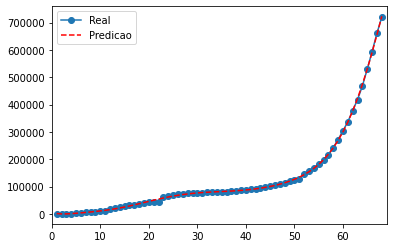

In [25]:
z = np.polyfit(x,y,10)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 68)
y_new = f(x_new)

plt.plot(x,y,'o-',label='Real')
plt.plot(x_new, y_new,'r--',label='Predicao')
plt.legend()
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

Previsao para os proximos 5 dias:  [723302 792061 859518 922494 976865]


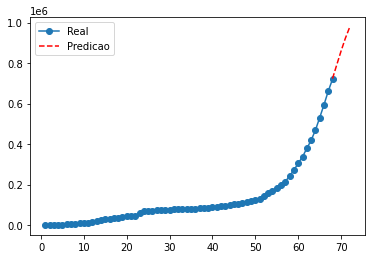

In [26]:
dias5 = np.array(range(68,73))
pred = f(dias5)
print('Previsao para os proximos 5 dias: ', pred.astype(int))

plt.plot(x,y,'o-',label='Real')
plt.plot(dias5,pred,'r--',label='Predicao')
plt.legend()
plt.show()